In [15]:
# sample opencv code
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# RGB masking
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()

    (B, G, R) = cv.split(frame)

    # calculate individual conditions
    _, t1 = cv.threshold(R, 95, 255, cv.THRESH_BINARY)
    _, t2 = cv.threshold(G, 40, 255, cv.THRESH_BINARY)
    _, t3 = cv.threshold(B, 20, 255, cv.THRESH_BINARY)

    _, t4 = cv.threshold(np.maximum(np.maximum(R, G), B) - np.minimum(np.minimum(R, G), B), 15, 255, cv.THRESH_BINARY)
    _, t5 = cv.threshold(np.maximum(R, G) - np.minimum(R, G), 15, 255, cv.THRESH_BINARY)
    _, t6 = cv.threshold(R-G, 1, 255, cv.THRESH_BINARY)
    _, t7 = cv.threshold(R-B, 1, 255, cv.THRESH_BINARY)


    t = cv.bitwise_and(t1, t2)
    t = cv.bitwise_and(t, t3)
    t = cv.bitwise_and(t, t4)
    t = cv.bitwise_and(t, t5)
    t = cv.bitwise_and(t, t6)
    t = cv.bitwise_and(t, t7)

    cv.imshow('frame', frame)
    cv.imshow('rgb mask', t)
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [17]:
rgb_mask = t

In [18]:
# rg masking
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()

    frame = frame.astype(np.uint16)
    (B, G, R) = cv.split(frame)
    frame = frame.astype(np.uint8)
    
    r = np.nan_to_num(R / (R + G + B))
    g = np.nan_to_num(G / (R + G + B))

    Qp = -1.3767*r**2 + 1.0743*r + 0.1452
    Qm = -0.776*r**2 + 0.5601*r + 0.1766
    W = (r - 0.33)**2 + (g - 0.33)**2


    _, t1 = cv.threshold(Qp-g, 0, 255, cv.THRESH_BINARY)
    _, t2 = cv.threshold(g-Qm, 0, 255, cv.THRESH_BINARY)
    _, t3 = cv.threshold(W-0.0004, 0, 255, cv.THRESH_BINARY)
    _, t4 = cv.threshold(r-0.2, 0, 255, cv.THRESH_BINARY)
    _, t5 = cv.threshold(0.6-r, 0, 255, cv.THRESH_BINARY)

    
    t = cv.bitwise_and(t1, t2)
    t = cv.bitwise_and(t, t3)
    t = cv.bitwise_and(t, t4)

    cv.imshow('frame', frame)
    cv.imshow('rg mask', t)
    if cv.waitKey(1) == ord('q'):
        break


cap.release()
cv.destroyAllWindows()

In [19]:
rg_mask = t

In [20]:
# YCrCb masking
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()

    ycrcb = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)
    (_, Cr, Cb) = cv.split(ycrcb)

    t1 = cv.inRange(ycrcb, (0, 137, 77), (255, 177, 127))
    _, t2 = cv.threshold(Cb + 0.6*Cr, 190, 215, cv.THRESH_BINARY)
    t2 = t2.astype(np.uint8)

    t = cv.bitwise_and(t1, t2)

    cv.imshow('frame', frame)
    cv.imshow('ycrcb mask', t)
    if cv.waitKey(1) == ord('q'):
        break


cap.release()
cv.destroyAllWindows()

In [21]:
ycbcr_mask = t

Text(0.5, 1.0, 'YCbCr mask')

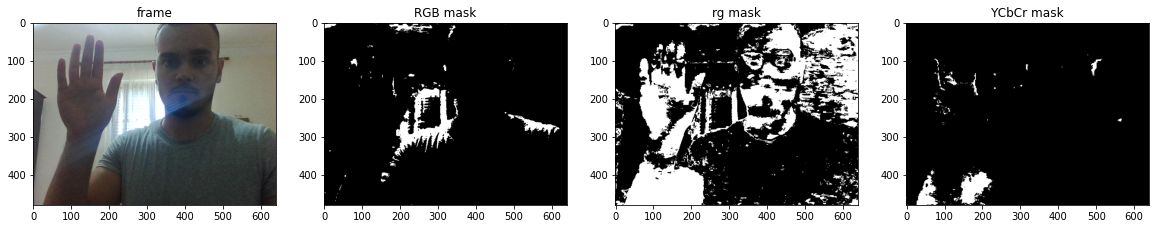

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes[0].imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
axes[0].set_title('frame')
axes[1].imshow(rgb_mask, cmap='gray')
axes[1].set_title('RGB mask')
axes[2].imshow(rg_mask, cmap='gray')
axes[2].set_title('rg mask')
axes[3].imshow(ycbcr_mask, cmap='gray')
axes[3].set_title('YCbCr mask')
